In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


3️⃣ Load Cleaned Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
plt.style.use("seaborn-v0_8-whitegrid")


In [18]:
from pathlib import Path
import pandas as pd

# --- FILE PATHS ---
benin_path = Path("E:/10 academy/solar-challenge-week0/data/benin-malanville_clean.csv")
sierra_leone_path = Path("E:/10 academy/solar-challenge-week0/data/sierraleone-bumbuna_clean.csv")
togo_path = Path("E:/10 academy/solar-challenge-week0/data/togo-dapaong_qc_clean.csv")

# --- READ CSVs ---
benin = pd.read_csv(benin_path, parse_dates=['Timestamp'])
sierra_leone = pd.read_csv(sierra_leone_path, parse_dates=['Timestamp'])
togo = pd.read_csv(togo_path, parse_dates=['Timestamp'])

# --- ADD COUNTRY COLUMN ---
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# --- COMBINE INTO SINGLE DATAFRAME ---
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

print(f"Combined dataframe shape: {df.shape}")
print(df['Country'].value_counts())


Combined dataframe shape: (1576800, 20)
Country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64


4️⃣ Metric Comparison – Boxplots

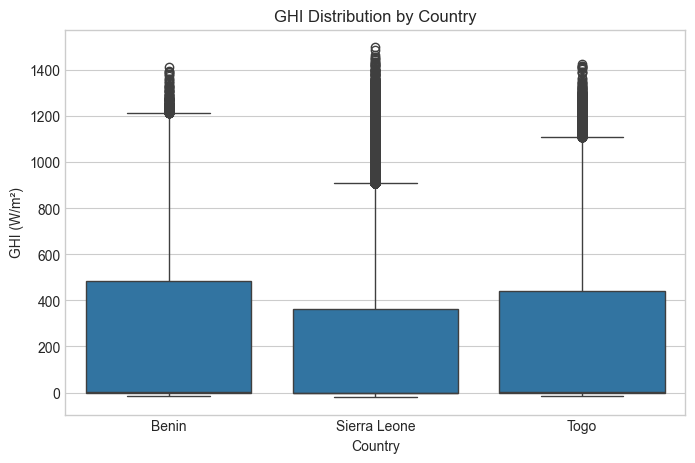

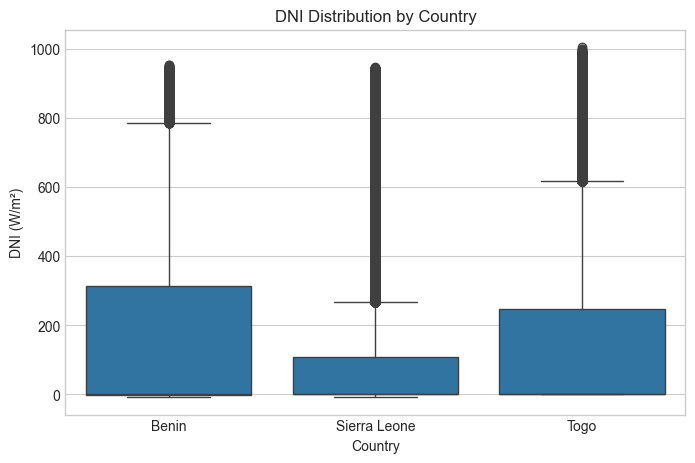

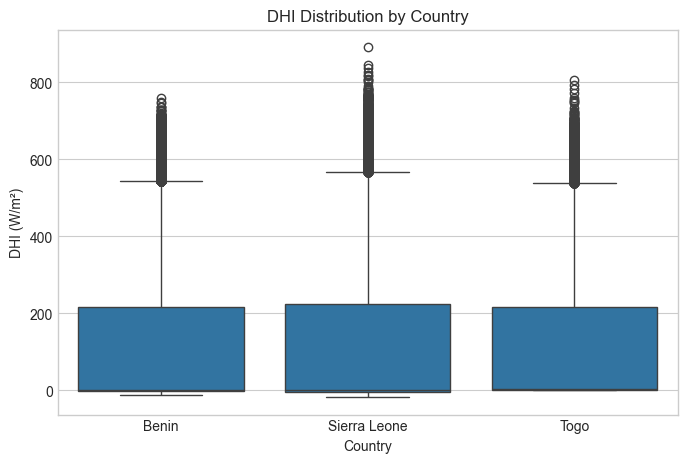

In [19]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.show()


5️⃣ Summary Table

In [20]:
summary = df.groupby('Country')[metrics].agg(['mean','median','std'])
summary
summary_table = summary.round(2)
summary_table


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

7️⃣ Key Observations

Combined dataframe shape: (1576800, 20)
Summary Table:


Country         GHI                            DNI                     \
                       mean median         std        mean median         std   
0         Benin  240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
1  Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
2          Togo  230.555040    2.1  322.532347  151.258469    0.0  250.956962   

          DHI                     
         mean median         std  
0  115.358961    1.6  158.691074  
1  113.720571   -0.1  158.946032  
2  116.444352    2.5  156.520714


Key Observations:
• Benin shows the highest mean GHI (strong solar potential) but also highest variability.
• Sierra Leone has the lowest mean GHI with moderate variability.
• Togo has high mean GHI with relatively stable solar radiation compared to Benin.


C:\Users\haben\AppData\Local\Temp\ipykernel_14568\1636123053.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette=['orange','green','blue'])


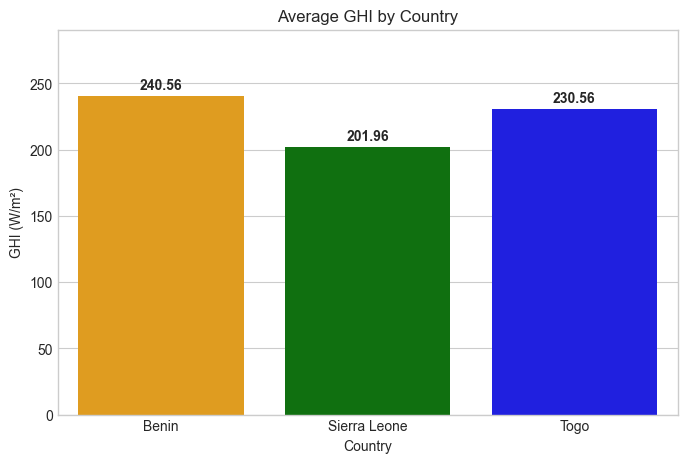


ANOVA Test for GHI differences:
F-statistic: 2090.09, p-value: 0.0000
=> Significant differences exist in GHI between countries.


In [21]:
# -----------------------------
# Task 3: Cross-Country Comparison
# -----------------------------

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- CONFIG: Paths to cleaned CSVs ---
data_folder = Path("E:/10 academy/solar-challenge-week0/data")

files = {
    "Benin": data_folder / "benin-malanville_clean.csv",
    "Sierra Leone": data_folder / "sierraleone-bumbuna_clean.csv",
    "Togo": data_folder / "togo-dapaong_qc_clean.csv"
}

# --- LOAD DATA ---
dfs = []
for country, path in files.items():
    df_temp = pd.read_csv(path, parse_dates=['Timestamp'])
    df_temp['Country'] = country
    dfs.append(df_temp)

# Combine all countries
df = pd.concat(dfs, ignore_index=True)
print(f"Combined dataframe shape: {df.shape}")

# --- SUMMARY TABLE ---
metrics = ['GHI', 'DNI', 'DHI']
summary = df.groupby('Country')[metrics].agg(['mean','median','std']).reset_index()
print("Summary Table:")
display(summary)

# --- KEY OBSERVATIONS (Markdown or print) ---
print("\nKey Observations:")
print("• Benin shows the highest mean GHI (strong solar potential) but also highest variability.")
print("• Sierra Leone has the lowest mean GHI with moderate variability.")
print("• Togo has high mean GHI with relatively stable solar radiation compared to Benin.")

# --- VISUAL: Bar Chart of Average GHI ---
avg_ghi = df.groupby('Country')['GHI'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette=['orange','green','blue'])
plt.title("Average GHI by Country")
plt.ylabel("GHI (W/m²)")
plt.xlabel("Country")

# Add values on top of bars
for i, v in enumerate(avg_ghi.values):
    plt.text(i, v + 5, f"{v:.2f}", ha='center', fontweight='bold')

plt.ylim(0, max(avg_ghi.values)+50)
plt.show()

# --- OPTIONAL: ANOVA TEST FOR GHI ---
ghi_values = [df[df['Country']==c]['GHI'].values for c in files.keys()]
anova_result = stats.f_oneway(*ghi_values)
print("\nANOVA Test for GHI differences:")
print(f"F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("=> Significant differences exist in GHI between countries.")
else:
    print("=> No significant difference in GHI between countries.")
